In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Dropout,Flatten,MaxPooling2D
import pandas as pd

In [3]:
# Load the training data from CSV file
train_data = pd.read_csv('../LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')
test_data = pd.read_csv('../LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')

x_train = train_data.drop('label', axis=1).values
y_train = train_data['label']

# Load the testing data from CSV file
x_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

num_classes = 10

In [4]:
num_classes=10

x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

x_train=x_train.reshape((-1,32,32,3))   # -1,28*28
x_test=x_test.reshape((-1,32,32,3))   # -1,28*28

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)



In [5]:
print("shape of training ",x_train.shape)
print("shape of testing ",x_test.shape)

shape of training  (50000, 32, 32, 3)
shape of testing  (10000, 32, 32, 3)


In [6]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
epochs = 10
h = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 56s 35ms/step - loss: 1.5403 - accuracy: 0.4353 - val_loss: 1.2604 - val_accuracy: 0.5464
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1681 - accuracy: 0.5848 - val_loss: 1.1995 - val_accuracy: 0.5813
Epoch 3/10
1563/1563 [==============================] - 57s 37ms/step - loss: 1.0129 - accuracy: 0.6429 - val_loss: 1.0267 - val_accuracy: 0.6454
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.9141 - accuracy: 0.6780 - val_loss: 0.9207 - val_accuracy: 0.6763
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8451 - accuracy: 0.7034 - val_loss: 0.9107 - val_accuracy: 0.6869
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7881 - accuracy: 0.7224 - val_loss: 0.8934 - val_accuracy: 0.6918
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7422 - accuracy: 0.7390 - val_loss: 0.8784 -

In [8]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.8600 - accuracy: 0.7133
Loss=0.860
Accuracy=0.713


313/313 [==============================] - 4s 12ms/step
Actual :  frog
Predicted :  frog


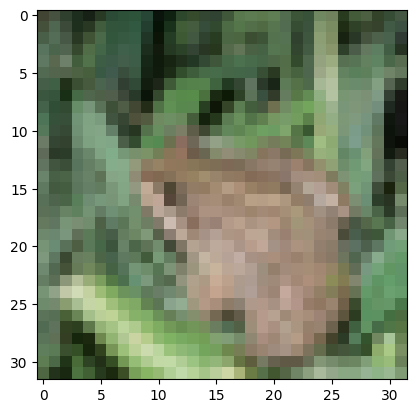

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
n=4
plt.imshow(x_test[n].reshape(32,32,3,), cmap='gray')
predicted_value = model.predict(x_test)
print("Actual : ",class_names[np.argmax(y_test[n])])
print("Predicted : ", class_names[np.argmax(predicted_value[n])])

In [10]:
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# plt.figure(figsize=(10,10))
# for i in range(10):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(x_train[i])
#     plt.xlabel(class_names[y_train[i][0]])
# plt.show()

In [ ]:
h = h.history
h.keys()

In [12]:
# Plot training & validation accuracy values
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
     

TypeError: 'History' object is not subscriptable

In [ ]:
# Plot training & validation accuracy values
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()